<a href="https://colab.research.google.com/github/matheusfantoni/analise_de_dados/blob/master/Limpeza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno
import datetime as dt

In [ ]:
airbnb = pd.read_csv('https://github.com/adelnehme/python-for-spreadsheet-users-webinar/blob/master/datasets/airbnb.csv?raw=true', index_col = 'Unnamed: 0')

In [ ]:
airbnb.head()

,listing_id,name,host_id,host_name,neighbourhood_full,coordinates,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added
0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,"Brooklyn, Flatlands","(40.63222, -73.93398)",Private room,45$,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08
1,22005115,Two floor apartment near Central Park,82746113,Cecilia,"Manhattan, Upper West Side","(40.78761, -73.96862)",Entire home/apt,135$,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25
2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,"Brooklyn, Brooklyn Heights","(40.7007, -73.99517)",Entire home/apt,150$,0,NaN,NaN,65,NaN,NaN,NaN,2018-08-15
3,6425850,"Spacious, charming studio",32715865,Yelena,"Manhattan, Upper West Side","(40.79169, -73.97498)",Entire home/apt,86$,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20
4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"Manhattan, Lower East Side","(40.71884, -73.98354)",Private room,160$,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23


In [ ]:
airbnb.dtypes

listing_id              int64
name                   object
host_id                 int64
host_name              object
neighbourhood_full     object
coordinates            object
room_type              object
price                  object
number_of_reviews       int64
last_review            object
reviews_per_month     float64
availability_365        int64
rating                float64
number_of_stays       float64
5_stars               float64
listing_added          object
dtype: object

In [ ]:
# Print number of missing values
airbnb.isna().sum()

listing_id               0
name                     5
host_id                  0
host_name                2
neighbourhood_full       0
coordinates              0
room_type                0
price                  238
number_of_reviews        0
last_review           2075
reviews_per_month     2075
availability_365         0
rating                2075
number_of_stays       2075
5_stars               2075
listing_added            0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


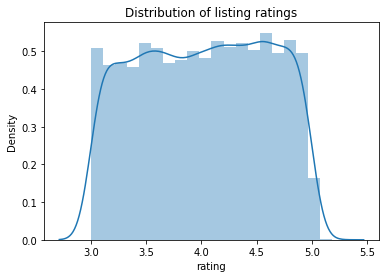

In [ ]:
# Visualize the distribution of the rating column
sns.distplot(airbnb['rating'], bins = 20)
plt.title('Distribution of listing ratings')
plt.show()

## **Principais Problemas:**



### 1) Coordenadas juntas(latitude e longitude) e em formato de string


In [ ]:
airbnb['coordinates'] = airbnb['coordinates'].str.replace("(","")
airbnb['coordinates'] = airbnb['coordinates'].str.replace(")","")

In [ ]:
lat_longitude = airbnb['coordinates'].str.split("," ,expand = True)

In [ ]:
airbnb['latitude'] = lat_longitude[0]
airbnb['longitude'] = lat_longitude[1]

In [ ]:
airbnb['latitude'] = airbnb['latitude'].astype('float')
airbnb['longitude'] = airbnb['longitude'].astype('float')

In [ ]:
airbnb.drop('coordinates', axis=1, inplace=True)

### 2) Preço em formato de String com um $

In [ ]:
airbnb['price'] = airbnb['price'].str.replace("$","")

In [ ]:
airbnb['price'] = airbnb['price'].astype('float')

In [ ]:
airbnb[airbnb['price'] == 0]

,listing_id,name,host_id,host_name,neighbourhood_full,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude
4645,20933849,the best you can find,13709292,Qiuchi,"Manhattan, Murray Hill",Entire home/apt,0.0,0,NaN,NaN,0,NaN,NaN,NaN,2018-04-21,40.75091,-73.97597
8509,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Kimberly,"Brooklyn, Bedford-Stuyvesant",Private room,0.0,1,2018-01-06,0.05,28,3.778723,1.2,0.757915,2017-07-03,40.69023,-73.95428


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


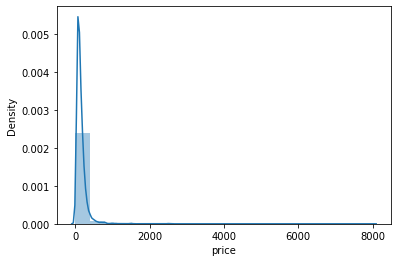

In [ ]:
sns.distplot(airbnb['price'],bins=20)
plt.show()

### 3) last_review e listing_added devem ser do tipo datetime

In [ ]:
airbnb[['last_review','listing_added']]

,last_review,listing_added
0,2018-12-12,2018-06-08
1,2019-06-30,2018-12-25
2,NaN,2018-08-15
3,2017-09-23,2017-03-20
4,2019-06-12,2020-10-23
...,...,...
10014,2018-05-28,2017-11-22
10015,2018-05-06,2017-10-31
10016,2016-11-27,2016-05-24
10017,2019-05-31,2018-11-25


In [ ]:
airbnb['listing_added'] = pd.to_datetime(airbnb['listing_added'],format='%Y-%m-%d')
airbnb['last_review'] = pd.to_datetime(airbnb['last_review'],format='%Y-%m-%d')

In [ ]:
airbnb[['last_review','listing_added']].dtypes

last_review      datetime64[ns]
listing_added    datetime64[ns]
dtype: object

### 4) Dados ausentes nas colunas

In [ ]:
airbnb['reviews_per_month'].fillna(0,inplace=True)
airbnb['availability_365'].fillna(0,inplace=True)
airbnb['rating'].fillna(0,inplace=True)
airbnb['number_of_stays'].fillna(0,inplace=True)
airbnb['5_stars'].fillna(0,inplace=True)

In [ ]:
#len(airbnb[airbnb['last_review'].isna()])
airbnb['last_review'].fillna(airbnb['listing_added'],inplace=True)

In [ ]:
airbnb['price'].fillna(airbnb['price'].mean(),inplace=True)

In [ ]:
airbnb['host_name'].fillna('UNNAMED',inplace=True)
airbnb['host_name'].fillna('UNNAMED',inplace=True)

In [ ]:
airbnb.isna().sum()

listing_id                0
name                      0
host_id                   0
host_name                 0
room_type                 0
price                     0
number_of_reviews         0
last_review               0
reviews_per_month         0
availability_365          0
rating                    0
number_of_stays           0
5_stars                   0
listing_added             0
latitude                  0
longitude                 0
neighbourhood             0
neighbourhood_detailed    0
dtype: int64

### 5) Separar o nome da vizinhança (neighbourhood_full)

In [ ]:
neighbourhood = airbnb['neighbourhood_full'].str.split("," ,expand = True)

In [ ]:
airbnb['neighbourhood'] = neighbourhood[0]
airbnb['neighbourhood_detailed'] = neighbourhood[1]

In [ ]:
airbnb.drop('neighbourhood_full', axis=1, inplace=True)

In [ ]:
airbnb['neighbourhood_detailed'] = airbnb['neighbourhood_detailed'].str.strip()

In [ ]:
airbnb['neighbourhood_detailed'].unique()

array(['Flatlands', 'Upper West Side', 'Brooklyn Heights',
       'Lower East Side', 'Greenwich Village', 'Harlem', 'Sheepshead Bay',
       'Theater District', 'Bushwick', 'Laurelton', 'Mott Haven',
       'Flushing', 'Crown Heights', 'Midtown', 'Financial District',
       'East Village', 'Park Slope', 'Washington Heights', 'Williamsburg',
       'Chelsea', 'Bedford-Stuyvesant', 'Gowanus', 'Upper East Side',
       'Ditmars Steinway', 'Cypress Hills', "Hell's Kitchen", 'Ridgewood',
       'Marble Hill', 'Kips Bay', 'Prospect Heights', 'East New York',
       'Concord', 'Stapleton', 'Astoria', 'East Harlem', 'Sunnyside',
       'Gramercy', 'Prospect-Lefferts Gardens', 'Sunset Park',
       'Forest Hills', 'Windsor Terrace', 'Clinton Hill', 'Murray Hill',
       'Flatiron District', 'Greenpoint', 'East Flatbush', 'Tribeca',
       'Woodhaven', 'Fort Greene', 'Inwood', 'Chinatown',
       'Rockaway Beach', 'Woodside', 'Bayside', 'Bensonhurst', 'SoHo',
       'Red Hook', 'West Village', 

In [ ]:
airbnb

,listing_id,name,host_id,host_name,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude,neighbourhood,neighbourhood_detailed
0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,Private room,45.0,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08,40.63222,-73.93398,Brooklyn,Flatlands
1,22005115,Two floor apartment near Central Park,82746113,Cecilia,Entire home/apt,135.0,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25,40.78761,-73.96862,Manhattan,Upper West Side
2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,Entire home/apt,150.0,0,NaT,NaN,65,NaN,NaN,NaN,2018-08-15,40.70070,-73.99517,Brooklyn,Brooklyn Heights
3,6425850,"Spacious, charming studio",32715865,Yelena,Entire home/apt,86.0,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20,40.79169,-73.97498,Manhattan,Upper West Side
4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,Private room,160.0,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23,40.71884,-73.98354,Manhattan,Lower East Side
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10014,22307861,Lovely 1BR Harlem apartment,16004068,Rachel,Entire home/apt,105.0,4,2018-05-28,0.21,0,4.757555,4.8,0.639223,2017-11-22,40.80379,-73.95257,Manhattan,Harlem
10015,953275,Apartment For Your Holidays in NYC!,4460034,Alain,Entire home/apt,125.0,50,2018-05-06,0.66,188,4.344704,60.0,0.648778,2017-10-31,40.79531,-73.93330,Manhattan,East Harlem
10016,3452835,"Artsy, Garden Getaway in Central Brooklyn",666862,Amy,Entire home/apt,100.0,45,2016-11-27,0.98,0,3.966214,54.0,0.631713,2016-05-24,40.68266,-73.96743,Brooklyn,Clinton Hill
10017,23540194,"Immaculate townhouse in Clinton Hill, Brooklyn",67176930,Sophie,Entire home/apt,450.0,2,2019-05-31,0.17,99,4.078581,2.4,0.703360,2018-11-25,40.68832,-73.96366,Brooklyn,Clinton Hill


### 6) Categorizar em números  variável room_type em apenas 3 tipos principais

In [ ]:
airbnb['room_type'] = airbnb['room_type'].str.lower()

In [ ]:
airbnb['room_type'] = airbnb['room_type'].str.strip()

In [ ]:
airbnb['room_type'].unique()

array(['private room', 'entire home/apt', 'private', 'shared room',
       'home'], dtype=object)

In [ ]:
mappings = {
    'private room': 1,
    'private': 1,
    'entire home/apt': 2,
    'home': 2,
    'shared room': 3
}

airbnb['room_type'] = airbnb['room_type'].replace(mappings)

In [ ]:
airbnb['room_type'] = airbnb['room_type'].astype('int')

In [ ]:
airbnb['room_type']

0        1
1        2
2        2
3        2
4        1
        ..
10014    2
10015    2
10016    2
10017    2
10018    1
Name: room_type, Length: 10019, dtype: int64

### 7) Remover linhas com rating > 5

In [ ]:
airbnb[airbnb['rating'] > 5]

,listing_id,name,host_id,host_name,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude,neighbourhood,neighbourhood_detailed
1925,36411407,Brand new 1 bedroom steps from Soho!,33917435,Mike,2,150.0,1,2019-07-06,1.0,13,5.017040,1.2,0.870161,2018-12-31,40.71825,-73.99019,Manhattan,Lower East Side
6732,36390226,Comfortable clean Bedstuy private room,267932490,Angela,1,45.0,2,2019-07-08,2.0,14,5.087091,2.4,0.950339,2019-01-02,40.69551,-73.93951,Brooklyn,Bedford-Stuyvesant
8821,36413632,Spacious 2BR in Beautiful Brooklyn Heights,6608220,Matt,2,550.0,1,2019-07-07,1.0,230,5.181114,1.2,0.805418,2019-01-01,40.69827,-73.99649,Brooklyn,Brooklyn Heights


In [ ]:
airbnb.drop(airbnb[airbnb['rating'] > 5.0].index, inplace = True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


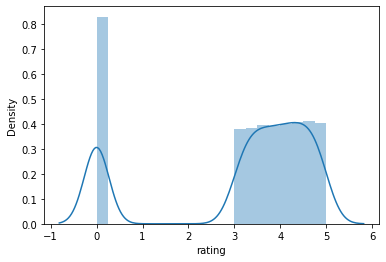

In [ ]:
sns.distplot(airbnb['rating'], bins=20)

In [ ]:
airbnb['rating'].min()

0.0

### 8) Remover dados duplicados

In [ ]:
airbnb = airbnb.drop_duplicates()

In [ ]:
duplicates = airbnb.duplicated(subset='listing_id', keep=False)

In [ ]:
airbnb[duplicates].sort_values('listing_id')

,listing_id,name,host_id,host_name,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude,neighbourhood,neighbourhood_detailed
5761,2044392,The heart of Williamsburg 2 bedroom,620218,Sarah,2,250.0,0,2018-05-24,0.00,0,0.000000,0.0,0.000000,2018-05-24,40.71257,-73.96149,Brooklyn,Williamsburg
8699,2044392,The heart of Williamsburg 2 bedroom,620218,Sarah,2,245.0,0,2018-08-09,0.00,0,0.000000,0.0,0.000000,2018-08-09,40.71257,-73.96149,Brooklyn,Williamsburg
2871,4244242,Best Bedroom in Bedstuy/Bushwick. Ensuite bath...,22023014,BrooklynSleeps,1,70.0,110,2019-06-23,1.96,323,4.962314,132.0,0.809882,2018-12-18,40.69496,-73.93949,Brooklyn,Bedford-Stuyvesant
4187,4244242,Best Bedroom in Bedstuy/Bushwick. Ensuite bath...,22023014,BrooklynSleeps,1,73.0,110,2019-06-23,1.96,323,4.962314,132.0,0.809882,2018-12-18,40.69496,-73.93949,Brooklyn,Bedford-Stuyvesant
77,7319856,450ft Square Studio in Gramercy NY,11773680,Adam,2,289.0,4,2016-05-22,0.09,225,3.903764,4.8,0.756381,2015-11-17,40.73813,-73.98098,Manhattan,Kips Bay
2255,7319856,450ft Square Studio in Gramercy NY,11773680,Adam,2,280.0,4,2016-05-22,0.09,225,3.903764,4.8,0.756381,2015-11-17,40.73813,-73.98098,Manhattan,Kips Bay
555,9078222,"Prospect Park 3 bdrm, Sleeps 8 (#2)",47219962,Babajide,2,154.0,123,2019-07-01,2.74,263,3.466881,147.6,0.738191,2018-12-26,40.66086,-73.96159,Brooklyn,Prospect-Lefferts Gardens
7933,9078222,"Prospect Park 3 bdrm, Sleeps 8 (#2)",47219962,Babajide,2,150.0,123,2019-07-01,2.74,263,3.466881,147.6,0.738191,2018-12-26,40.66086,-73.96159,Brooklyn,Prospect-Lefferts Gardens
1481,15027024,Newly renovated 1bd on lively & historic St Marks,8344620,Ethan,2,180.0,10,2018-12-31,0.30,0,3.969729,12.0,0.772513,2018-06-27,40.72693,-73.98385,Manhattan,East Village
3430,15027024,Newly renovated 1bd on lively & historic St Marks,8344620,Ethan,2,180.0,10,2018-12-31,0.30,0,3.869729,12.0,0.772513,2018-06-27,40.72693,-73.98385,Manhattan,East Village


In [ ]:
columns_names = airbnb.columns
columns_names

Index(['listing_id', 'name', 'host_id', 'host_name', 'room_type', 'price',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'availability_365', 'rating', 'number_of_stays', '5_stars',
       'listing_added', 'latitude', 'longitude', 'neighbourhood',
       'neighbourhood_detailed'],
      dtype='object')

In [ ]:
aggregations = {column_name: 'first' for column_name in columns_names.difference(['listing_id','listing_added', 'last_review','price','rating','number_of_reviews','5_stars','availability_365'])} 

aggregations['listing_added'] = 'min'
aggregations['last_review'] = 'max'
aggregations['price'] = 'mean'
aggregations['rating'] = 'mean'
aggregations['number_of_reviews'] = 'sum'
aggregations['5_stars'] = 'mean'
aggregations['availability_365'] = 'max'

aggregations

{'5_stars': 'mean',
 'availability_365': 'max',
 'host_id': 'first',
 'host_name': 'first',
 'last_review': 'max',
 'latitude': 'first',
 'listing_added': 'min',
 'longitude': 'first',
 'name': 'first',
 'neighbourhood': 'first',
 'neighbourhood_detailed': 'first',
 'number_of_reviews': 'sum',
 'number_of_stays': 'first',
 'price': 'mean',
 'rating': 'mean',
 'reviews_per_month': 'first',
 'room_type': 'first'}

In [ ]:
airbnb = airbnb.groupby('listing_id').agg(aggregations).reset_index()

In [ ]:
airbnb

,listing_id,host_id,host_name,latitude,longitude,name,neighbourhood,neighbourhood_detailed,number_of_stays,reviews_per_month,room_type,listing_added,last_review,price,rating,number_of_reviews,5_stars,availability_365
0,3831,4869,LisaRoxanne,40.68514,-73.95976,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,324.0,4.64,2,2018-12-30,2019-07-05,89.0,3.273935,270,0.757366,194
1,6848,15991,Allen & Irina,40.70837,-73.95352,Only 2 stops to Manhattan studio,Brooklyn,Williamsburg,177.6,1.20,2,2018-12-24,2019-06-29,140.0,3.495760,148,0.789743,46
2,7322,18946,Doti,40.74192,-73.99501,Chelsea Perfect,Manhattan,Chelsea,312.0,2.12,1,2018-12-26,2019-07-01,140.0,4.389051,260,0.669873,12
3,7726,20950,Adam And Charity,40.67592,-73.94694,Hip Historic Brownstone Apartment with Backyard,Brooklyn,Crown Heights,63.6,4.44,2,2018-12-17,2019-06-22,99.0,3.305382,53,0.640251,21
4,12303,47618,Yolande,40.69673,-73.97584,1bdr w private bath. in lofty apt,Brooklyn,Fort Greene,30.0,0.23,1,2018-03-27,2018-09-30,120.0,4.568745,25,0.918593,311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,36479230,65767720,Melanie,40.70418,-73.91471,Studio sized room with beautiful light,Brooklyn,Bushwick,0.0,0.00,1,2018-08-21,2018-08-21,42.0,0.000000,0,0.000000,16
9992,36484665,8232441,Sabrina,40.67853,-73.94995,Charming one bedroom - newly renovated rowhouse,Brooklyn,Bedford-Stuyvesant,0.0,0.00,1,2018-04-19,2018-04-19,70.0,0.000000,0,0.000000,9
9993,36485057,6570630,Marisol,40.70184,-73.93317,Affordable room in Bushwick/East Williamsburg,Brooklyn,Bushwick,0.0,0.00,1,2018-07-06,2018-07-06,40.0,0.000000,0,0.000000,36
9994,36485431,23492952,Ilgar & Aysel,40.81475,-73.94867,Sunny Studio at Historical Neighborhood,Manhattan,Harlem,0.0,0.00,2,2018-07-26,2018-07-26,115.0,0.000000,0,0.000000,27


In [ ]:
airbnb[airbnb.duplicated(subset='listing_id', keep=False)]

,listing_id,host_id,host_name,latitude,longitude,name,neighbourhood,neighbourhood_detailed,number_of_stays,reviews_per_month,room_type,listing_added,last_review,price,rating,number_of_reviews,5_stars,availability_365


### 9) Qual é o preço médio das listagens por bairro? Veja seus resultados com um gráfico de barras!


In [ ]:
airbnb.groupby('neighbourhood').agg({'price': 'mean'}).reset_index()

,neighbourhood,price
0,Bronx,89.229784
1,Brooklyn,124.056895
2,Manhattan,193.215425
3,Queens,97.984487
4,Staten Island,93.941306


### 10) Qual é a disponibilidade média em dias de anúncios por bairro? Veja seus resultados com um gráfico de barras!


In [ ]:
airbnb.groupby('neighbourhood').agg({'availability_365': 'mean'}).reset_index()

,neighbourhood,availability_365
0,Bronx,146.716157
1,Brooklyn,99.558528
2,Manhattan,112.180937
3,Queens,143.851820
4,Staten Island,214.205479


### 11) Qual é o preço médio por tipo de quarto em cada bairro? Veja seus resultados com um gráfico de barras! 

In [ ]:
airbnb_group_neigh_price = airbnb.groupby(['room_type','neighbourhood']).agg({'price': 'mean'}).reset_index()

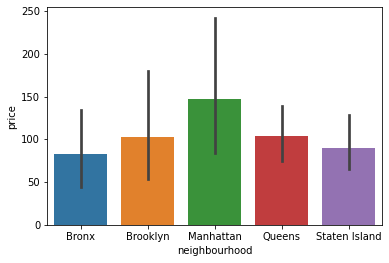

In [ ]:
sns.barplot(x = airbnb_group_neigh_price['neighbourhood'], y = airbnb_group_neigh_price['price'], data = airbnb_group_neigh_price)


In [ ]:
airbnb

,listing_id,host_id,host_name,latitude,longitude,name,neighbourhood,neighbourhood_detailed,number_of_stays,reviews_per_month,room_type,listing_added,last_review,price,rating,number_of_reviews,5_stars,availability_365
0,3831,4869,LisaRoxanne,40.68514,-73.95976,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,324.0,4.64,2,2018-12-30,2019-07-05,89.0,3.273935,270,0.757366,194
1,6848,15991,Allen & Irina,40.70837,-73.95352,Only 2 stops to Manhattan studio,Brooklyn,Williamsburg,177.6,1.20,2,2018-12-24,2019-06-29,140.0,3.495760,148,0.789743,46
2,7322,18946,Doti,40.74192,-73.99501,Chelsea Perfect,Manhattan,Chelsea,312.0,2.12,1,2018-12-26,2019-07-01,140.0,4.389051,260,0.669873,12
3,7726,20950,Adam And Charity,40.67592,-73.94694,Hip Historic Brownstone Apartment with Backyard,Brooklyn,Crown Heights,63.6,4.44,2,2018-12-17,2019-06-22,99.0,3.305382,53,0.640251,21
4,12303,47618,Yolande,40.69673,-73.97584,1bdr w private bath. in lofty apt,Brooklyn,Fort Greene,30.0,0.23,1,2018-03-27,2018-09-30,120.0,4.568745,25,0.918593,311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,36479230,65767720,Melanie,40.70418,-73.91471,Studio sized room with beautiful light,Brooklyn,Bushwick,0.0,0.00,1,2018-08-21,2018-08-21,42.0,0.000000,0,0.000000,16
9992,36484665,8232441,Sabrina,40.67853,-73.94995,Charming one bedroom - newly renovated rowhouse,Brooklyn,Bedford-Stuyvesant,0.0,0.00,1,2018-04-19,2018-04-19,70.0,0.000000,0,0.000000,9
9993,36485057,6570630,Marisol,40.70184,-73.93317,Affordable room in Bushwick/East Williamsburg,Brooklyn,Bushwick,0.0,0.00,1,2018-07-06,2018-07-06,40.0,0.000000,0,0.000000,36
9994,36485431,23492952,Ilgar & Aysel,40.81475,-73.94867,Sunny Studio at Historical Neighborhood,Manhattan,Harlem,0.0,0.00,2,2018-07-26,2018-07-26,115.0,0.000000,0,0.000000,27
